In [1]:
import os
import pandas as pd

from qsprpred.data import QSPRDataset, RandomSplit
from qsprpred.data.descriptors.fingerprints import MorganFP
from qsprpred.data.descriptors.sets import SmilesDesc

os.makedirs("/home/s2861704/ppk/test_kin/test_output/qsprst/data", exist_ok=True)

df=pd.read_csv('/home/s2861704/ppk/test_kin/prep_storage/K200_EGFR_TEST.csv', sep=',')
display(df)
print(df['target_id'].unique())

,Activity_ID,Quality,source,CID,SMILES,connectivity,InChIKey,InChI,InChI_AuxInfo,target_id,...,Activity_class,relation,pchembl_value,pchembl_value_Mean,pchembl_value_StdDev,pchembl_value_SEM,pchembl_value_N,pchembl_value_Median,pchembl_value_MAD,Classification
0,AAAAZQPHATYWOK_on_P00533_WT,High,ChEMBL31;Sharma2016;Sharma2016,ChEMBL31.compound.33854;4277046;4277046,CCOc1cc2ncc(C#N)c(Nc3ccc(OCc4nc5ccccc5s4)c(Cl)...,AAAAZQPHATYWOK,AAAAZQPHATYWOK-UHFFFAOYSA-N,InChI=1S/C32H29ClN6O3S/c1-4-41-28-16-25-22(15-...,"""AuxInfo=1/1/N:1,17,18,2,34,33,14,35,32,13,38,...",P00533_WT,...,NaN,=,6.730; 6.726; 6.063,6.506,0.313000,0.222,3.0,6.726,0.004,Enzyme->Kinase->Protein Kinase->TK protein kin...
1,AAEPFBULPJOZCS_on_P00533_WT,High,Sharma2016,10064954,C=CC(=O)Nc1cccc(-n2c(=O)cc(C)c3cnc(Nc4cn(C)nc4...,AAEPFBULPJOZCS,AAEPFBULPJOZCS-UHFFFAOYSA-N,InChI=1S/C22H18F3N7O2/c1-4-17(33)27-13-6-5-7-1...,"""AuxInfo=1/1/N:1,16,25,2,8,7,9,14,34,33,23,15,...",P00533_WT,...,NaN,=,7.276,7.276,0.000000,0.000,1.0,7.276,0.000,Enzyme->Kinase->Protein Kinase->TK protein kin...
2,AAFHSECTTHOVFV_on_P00533_WT,High,Sharma2016,4486432,COc1cc(N2CCN(C)CC2)ccc1Nc1ncc2c(n1)N(c1cccc(N)...,AAFHSECTTHOVFV,AAFHSECTTHOVFV-UHFFFAOYSA-N,InChI=1S/C25H30N8O2/c1-30-9-11-32(12-10-30)19-...,"""AuxInfo=1/1/N:32,14,1,23,22,24,26,25,30,33,29...",P00533_WT,...,NaN,=,6.321; 5.311; 4.952,5.528,0.580000,0.410,3.0,5.311,0.359,Enzyme->Kinase->Protein Kinase->TK protein kin...
3,AAGKMGNYUYCEPD_on_P00533_WT,High,ChEMBL31,ChEMBL31.compound.183555,CC(=O)NCCn1ccc2ncnc(Nc3ccc(Oc4cccc5sncc45)c(Cl...,AAGKMGNYUYCEPD,AAGKMGNYUYCEPD-UHFFFAOYSA-N,InChI=1S/C23H19ClN6O2S/c1-14(31)25-8-10-30-9-7...,"""AuxInfo=1/1/N:1,22,21,23,30,29,9,5,8,6,15,26,...",P00533_WT,...,NaN,=,8.540,8.540,0.000000,0.000,1.0,8.540,0.000,Enzyme->Kinase->Protein Kinase->TK protein kin...
4,AAHKGRWRYBCWDL_on_P00533_WT,High,Sharma2016,4358384,CCOc1ccc(-c2nn(C3CCCC3)c3ncnc(N)c23)cc1OC,AAHKGRWRYBCWDL,AAHKGRWRYBCWDL-UHFFFAOYSA-N,InChI=1S/C19H23N5O2/c1-3-26-14-9-8-12(10-15(14...,"""AuxInfo=1/1/N:1,7,2,15,16,14,17,25,26,8,23,9,...",P00533_WT,...,NaN,=,5.854,5.854,0.000000,0.000,1.0,5.854,0.000,Enzyme->Kinase->Protein Kinase->TK protein kin...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15998,ZZKJYWJMKZJTKA_on_P04626_WT,High,ChEMBL31,ChEMBL31.compound.221773,NS(=O)(=O)CCNCc1ccc(-c2ccc3ncnc(Nc4ccc(OCc5ccc...,ZZKJYWJMKZJTKA,ZZKJYWJMKZJTKA-UHFFFAOYSA-N,InChI=1S/C28H25ClFN5O4S/c29-24-14-21(5-8-27(24...,"""AuxInfo=1/1/N:31,30,32,14,37,10,15,36,11,6,5,...",P04626_WT,...,NaN,=,8.41,8.410,0.000000,0.000,1.0,8.410,0.000,Enzyme->Kinase->Protein Kinase->TK protein kin...
15999,ZZRGSHVUZJRFKX_on_P00533_WT,High,ChEMBL31,ChEMBL31.compound.85261;4348271,NC1CCN(Cc2ccn3ncnc(Nc4ccc(OCc5cccc(F)c5)c(Cl)c...,ZZRGSHVUZJRFKX,ZZRGSHVUZJRFKX-UHFFFAOYSA-N,InChI=1S/C25H26ClFN6O/c26-22-13-21(4-5-23(22)3...,"""AuxInfo=1/1/N:20,19,21,26,25,32,3,34,4,33,31,...",P00533_WT,...,NaN,=,7.42;7.42,7.420,0.000000,0.000,2.0,7.420,0.000,Enzyme->Kinase->Protein Kinase->TK protein kin...
16000,ZZRGSHVUZJRFKX_on_P04626_WT,High,ChEMBL31,ChEMBL31.compound.85261,NC1CCN(Cc2ccn3ncnc(Nc4ccc(OCc5cccc(F)c5)c(Cl)c...,ZZRGSHVUZJRFKX,ZZRGSHVUZJRFKX-UHFFFAOYSA-N,InChI=1S/C25H26ClFN6O/c26-22-13-21(4-5-23(22)3...,"""AuxInfo=1/1/N:20,19,21,26,25,32,3,34,4,33,31,...",P04626_WT,...,NaN,=,7.5,7.500,0.000000,0.000,1.0,7.500,0.000,Enzyme->Kinase->Protein Kinase->TK protein kin...
16001,ZZYCYTFKFSOZMZ_on_P17948_WT,High,ChEMBL31,ChEMBL31.compound.56356,COc1ccc(Nc2nnc(-c3cccnc3CCc3ccncc3)o2)cc1OC,ZZYCYTFKFSOZMZ,ZZYCYTFKFSOZMZ-UHFFFAOYSA-N,InChI=1S/C22H21N5O3/c1-28-19-8-6-16(14-20(19)2...,"""AuxInfo=1/1/N:1,30,14,13,19,5,18,4,21,25,15,2...",P17948_WT,...,NaN,=,6.75,6.750,0.000000,0.000,1.0,6.750,0.000,Enzyme->Kinase->Protein Kinase->TK protein kin...


['P00533_WT' 'P04626_WT' 'P35968_WT' 'P17948_WT' 'P35916_WT' 'Q15303_WT']


In [2]:
df=df[df['target_id']== 'Q15303_WT']
display(df)

,Activity_ID,Quality,source,CID,SMILES,connectivity,InChIKey,InChI,InChI_AuxInfo,target_id,...,Activity_class,relation,pchembl_value,pchembl_value_Mean,pchembl_value_StdDev,pchembl_value_SEM,pchembl_value_N,pchembl_value_Median,pchembl_value_MAD,Classification
4459,ACNYXAIBELJFSP_on_Q15303_WT,High,ChEMBL31,ChEMBL31.compound.305338,CCOc1cc2ncnc(Nc3ccc4c(cnn4Cc4ccccc4)c3)c2cc1NC...,ACNYXAIBELJFSP,ACNYXAIBELJFSP-UHFFFAOYSA-N,InChI=1S/C34H39N7O2/c1-6-43-32-19-29-28(18-30(...,"""AuxInfo=1/1/N:1,14,15,17,18,2,34,33,35,10,32,...",Q15303_WT,...,NaN,=,8.220,8.220000,0.000000,0.000000,1.0,8.220,0.0000,Enzyme->Kinase->Protein Kinase->TK protein kin...
4460,AEBKFOMFJMJUFH_on_Q15303_WT,High,ChEMBL31,ChEMBL31.compound.305341,CCOc1cc2ncnc(Nc3ccc4c(cnn4Cc4ccccc4)c3)c2cc1NC...,AEBKFOMFJMJUFH,AEBKFOMFJMJUFH-UHFFFAOYSA-N,InChI=1S/C35H39N7O2/c1-4-44-33-20-30-29(19-31(...,"""AuxInfo=1/1/N:1,14,19,2,35,34,36,16,10,15,17,...",Q15303_WT,...,NaN,=,8.300,8.300000,0.000000,0.000000,1.0,8.300,0.0000,Enzyme->Kinase->Protein Kinase->TK protein kin...
4461,AECDBHGVIIRMOI_on_Q15303_WT,High,ChEMBL31,ChEMBL31.compound.297362,Nc1ncnc2c1c(-c1cccc(OCc3ccccc3)c1)cn2C1CC(CN2C...,AECDBHGVIIRMOI,AECDBHGVIIRMOI-UHFFFAOYSA-N,InChI=1S/C27H29N5O/c28-26-25-24(21-8-4-9-23(14...,"""AuxInfo=1/1/N:15,14,16,7,27,13,17,6,8,26,28,2...",Q15303_WT,...,NaN,=,5.770,5.770000,0.000000,0.000000,1.0,5.770,0.0000,Enzyme->Kinase->Protein Kinase->TK protein kin...
4462,AHBFBRPGNOVEBK_on_Q15303_WT,High,ChEMBL31,ChEMBL31.compound.373541,CC1(C(=O)N2CCCC(c3nc(-c4ccc(C(=O)Nc5cc(C(F)(F)...,AHBFBRPGNOVEBK,AHBFBRPGNOVEBK-UHFFFAOYSA-N,InChI=1S/C29H28F3N7O3/c1-28(15-42-16-28)27(41)...,"""AuxInfo=1/1/N:1,7,8,14,31,15,30,23,22,36,6,37...",Q15303_WT,...,NaN,=,6.930,6.930000,0.000000,0.000000,1.0,6.930,0.0000,Enzyme->Kinase->Protein Kinase->TK protein kin...
4463,AHONPWLSTJWLMC_on_Q15303_WT,High,ChEMBL31,ChEMBL31.compound.305331,CCC(=O)Nc1cc2c(Nc3ccc(OCc4ccccn4)cc3)ncnc2cc1OC,AHONPWLSTJWLMC,AHONPWLSTJWLMC-UHFFFAOYSA-N,InChI=1S/C24H23N5O3/c1-3-23(30)29-21-12-19-20(...,"""AuxInfo=1/1/N:1,9,2,27,26,28,18,30,19,29,25,3...",Q15303_WT,...,NaN,=,6.970,6.970000,0.000000,0.000000,1.0,6.970,0.0000,Enzyme->Kinase->Protein Kinase->TK protein kin...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15587,WDENQIQQYWYTPO_on_Q15303_WT,High,ChEMBL31,ChEMBL31.compound.363889,CC#CC(=O)N1CCCC1c1nc(-c2ccc(C(=O)Nc3ccccn3)cc2...,WDENQIQQYWYTPO,WDENQIQQYWYTPO-UHFFFAOYSA-N,InChI=1S/C26H23N7O2/c1-2-6-21(34)32-15-5-7-19(...,"""AuxInfo=1/1/N:1,2,25,24,8,3,9,26,15,28,16,27,...",Q15303_WT,...,NaN,=,6.85;7.8,7.325000,0.671751,0.475000,2.0,7.325,0.4750,Enzyme->Kinase->Protein Kinase->TK protein kin...
15593,WDQXCAKHPJSZET_on_Q15303_WT,High,ChEMBL31,ChEMBL31.compound.236229,O=C(C=CCN1CC2CCC1C(=O)C2)Nc1cc2c(Nc3ccc(F)c(Cl...,WDQXCAKHPJSZET,WDQXCAKHPJSZET-UHFFFAOYSA-N,InChI=1S/C23H21ClFN5O2S/c24-16-9-14(4-5-17(16)...,"""AuxInfo=1/1/N:4,3,9,32,31,10,5,14,26,17,7,21,...",Q15303_WT,...,NaN,=,7.43,7.430000,0.000000,0.000000,1.0,7.430,0.0000,Enzyme->Kinase->Protein Kinase->TK protein kin...
15684,XGALLCVXEZPNRQ_on_Q15303_WT,High,ChEMBL31,ChEMBL31.compound.2213;Christmann2016.compound...,COc1cc2ncnc(Nc3ccc(F)c(Cl)c3)c2cc1OCCCN1CCOCC1,XGALLCVXEZPNRQ,XGALLCVXEZPNRQ-UHFFFAOYSA-N,InChI=1S/C22H24ClFN4O3/c1-29-20-13-19-16(12-21...,"""AuxInfo=1/1/N:1,11,22,23,12,14,18,10,15,17,28...",Q15303_WT,...,NaN,=,6.32;6.8;6.387;6.387,6.473500,0.219946,0.109973,4.0,6.387,0.0335,Enzyme->Kinase->Protein Kinase->TK protein kin...
15750,XYFPWWZEPKGCCK_on_Q15303_WT,High,ChEMBL31,ChEMBL31.compound.302115,C=CC(=O)N1CCCC(n2nc(-c3ccc(Oc4ccccc4)cc3)c3c(N...,XYFPWWZEPKGCCK,XYFPWWZEPKGCCK-UHFFFAOYSA-N,InChI=1S/C25H24N6O2/c1-2-21(32)30-14-6-7-18(15...,"""AuxInfo=1/1/N:1,2,21,20,22,7,8,19,23,14,25,15...",Q15303_WT,...,NaN,=,7.52;8.74;9.22;8.62;9.6;8.47;8.15,8.617143,0.681682,0.257652,7.0,8.620,0.4700,Enzyme->Kinase->Protein Kinase->TK protein kin...


In [3]:
# Create dataset
dataset = QSPRDataset(
    df=df,
    store_dir="/home/s2861704/ppk/test_kin/test_output/qsprst/data",
    name="QSPRSTTestDataset",
    target_props=[{"name": "pchembl_value_Mean", "task": "REGRESSION"}],
    random_state=42,
    overwrite=True
)
dataset.getDF()

,Activity_ID,Quality,source,CID,SMILES,connectivity,InChIKey,InChI,InChI_AuxInfo,target_id,...,pchembl_value,pchembl_value_Mean,pchembl_value_StdDev,pchembl_value_SEM,pchembl_value_N,pchembl_value_Median,pchembl_value_MAD,Classification,QSPRID,pchembl_value_Mean_original
QSPRID,,,,,,,,,,,,,,,,,,,,,
QSPRSTTestDataset_000,ACNYXAIBELJFSP_on_Q15303_WT,High,ChEMBL31,ChEMBL31.compound.305338,CCOc1cc2ncnc(Nc3ccc4c(cnn4Cc4ccccc4)c3)c2cc1NC...,ACNYXAIBELJFSP,ACNYXAIBELJFSP-UHFFFAOYSA-N,InChI=1S/C34H39N7O2/c1-6-43-32-19-29-28(18-30(...,"""AuxInfo=1/1/N:1,14,15,17,18,2,34,33,35,10,32,...",Q15303_WT,...,8.220,8.220000,0.000000,0.000000,1.0,8.220,0.0000,Enzyme->Kinase->Protein Kinase->TK protein kin...,QSPRSTTestDataset_000,8.220000
QSPRSTTestDataset_001,AEBKFOMFJMJUFH_on_Q15303_WT,High,ChEMBL31,ChEMBL31.compound.305341,CCOc1cc2ncnc(Nc3ccc4c(cnn4Cc4ccccc4)c3)c2cc1NC...,AEBKFOMFJMJUFH,AEBKFOMFJMJUFH-UHFFFAOYSA-N,InChI=1S/C35H39N7O2/c1-4-44-33-20-30-29(19-31(...,"""AuxInfo=1/1/N:1,14,19,2,35,34,36,16,10,15,17,...",Q15303_WT,...,8.300,8.300000,0.000000,0.000000,1.0,8.300,0.0000,Enzyme->Kinase->Protein Kinase->TK protein kin...,QSPRSTTestDataset_001,8.300000
QSPRSTTestDataset_002,AECDBHGVIIRMOI_on_Q15303_WT,High,ChEMBL31,ChEMBL31.compound.297362,Nc1ncnc2c1c(-c1cccc(OCc3ccccc3)c1)cn2C1CC(CN2C...,AECDBHGVIIRMOI,AECDBHGVIIRMOI-UHFFFAOYSA-N,InChI=1S/C27H29N5O/c28-26-25-24(21-8-4-9-23(14...,"""AuxInfo=1/1/N:15,14,16,7,27,13,17,6,8,26,28,2...",Q15303_WT,...,5.770,5.770000,0.000000,0.000000,1.0,5.770,0.0000,Enzyme->Kinase->Protein Kinase->TK protein kin...,QSPRSTTestDataset_002,5.770000
QSPRSTTestDataset_003,AHBFBRPGNOVEBK_on_Q15303_WT,High,ChEMBL31,ChEMBL31.compound.373541,CC1(C(=O)N2CCCC(c3nc(-c4ccc(C(=O)Nc5cc(C(F)(F)...,AHBFBRPGNOVEBK,AHBFBRPGNOVEBK-UHFFFAOYSA-N,InChI=1S/C29H28F3N7O3/c1-28(15-42-16-28)27(41)...,"""AuxInfo=1/1/N:1,7,8,14,31,15,30,23,22,36,6,37...",Q15303_WT,...,6.930,6.930000,0.000000,0.000000,1.0,6.930,0.0000,Enzyme->Kinase->Protein Kinase->TK protein kin...,QSPRSTTestDataset_003,6.930000
QSPRSTTestDataset_004,AHONPWLSTJWLMC_on_Q15303_WT,High,ChEMBL31,ChEMBL31.compound.305331,CCC(=O)Nc1cc2c(Nc3ccc(OCc4ccccn4)cc3)ncnc2cc1OC,AHONPWLSTJWLMC,AHONPWLSTJWLMC-UHFFFAOYSA-N,InChI=1S/C24H23N5O3/c1-3-23(30)29-21-12-19-20(...,"""AuxInfo=1/1/N:1,9,2,27,26,28,18,30,19,29,25,3...",Q15303_WT,...,6.970,6.970000,0.000000,0.000000,1.0,6.970,0.0000,Enzyme->Kinase->Protein Kinase->TK protein kin...,QSPRSTTestDataset_004,6.970000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
QSPRSTTestDataset_171,WDENQIQQYWYTPO_on_Q15303_WT,High,ChEMBL31,ChEMBL31.compound.363889,CC#CC(=O)N1CCCC1c1nc(-c2ccc(C(=O)Nc3ccccn3)cc2...,WDENQIQQYWYTPO,WDENQIQQYWYTPO-UHFFFAOYSA-N,InChI=1S/C26H23N7O2/c1-2-6-21(34)32-15-5-7-19(...,"""AuxInfo=1/1/N:1,2,25,24,8,3,9,26,15,28,16,27,...",Q15303_WT,...,6.85;7.8,7.325000,0.671751,0.475000,2.0,7.325,0.4750,Enzyme->Kinase->Protein Kinase->TK protein kin...,QSPRSTTestDataset_171,7.325000
QSPRSTTestDataset_172,WDQXCAKHPJSZET_on_Q15303_WT,High,ChEMBL31,ChEMBL31.compound.236229,O=C(C=CCN1CC2CCC1C(=O)C2)Nc1cc2c(Nc3ccc(F)c(Cl...,WDQXCAKHPJSZET,WDQXCAKHPJSZET-UHFFFAOYSA-N,InChI=1S/C23H21ClFN5O2S/c24-16-9-14(4-5-17(16)...,"""AuxInfo=1/1/N:4,3,9,32,31,10,5,14,26,17,7,21,...",Q15303_WT,...,7.43,7.430000,0.000000,0.000000,1.0,7.430,0.0000,Enzyme->Kinase->Protein Kinase->TK protein kin...,QSPRSTTestDataset_172,7.430000
QSPRSTTestDataset_173,XGALLCVXEZPNRQ_on_Q15303_WT,High,ChEMBL31,ChEMBL31.compound.2213;Christmann2016.compound...,COc1cc2ncnc(Nc3ccc(F)c(Cl)c3)c2cc1OCCCN1CCOCC1,XGALLCVXEZPNRQ,XGALLCVXEZPNRQ-UHFFFAOYSA-N,InChI=1S/C22H24ClFN4O3/c1-29-20-13-19-16(12-21...,"""AuxInfo=1/1/N:1,11,22,23,12,14,18,10,15,17,28...",Q15303_WT,...,6.32;6.8;6.387;6.387,6.473500,0.219946,0.109973,4.0,6.387,0.0335,Enzyme->Kinase->Protein Kinase->TK protein kin...,QSPRSTTestDataset_173,6.473500


In [ ]:

# calculate compound features and split dataset into train and test
feature_calculators = [MorganFP(radius=3, nBits=2048)]
dataset.prepareDataset(
    split=RandomSplit(test_fraction=0.2, dataset=dataset), #luukkonen rges split implement
    feature_calculators=feature_calculators,
    recalculate_features=True,
)

print(f"Number of samples in train set: {len(dataset.y)}")
print(f"Number of samples in test set: {len(dataset.y_ind)}")

dataset.getDF().head()
dataset.save()

Number of samples in train set: 140
Number of samples in test set: 36


In [5]:
from qsprpred.models import SklearnModel
from sklearn.neighbors import KNeighborsRegressor
from qsprpred.models import CrossValAssessor, TestSetAssessor

os.makedirs("test_output/qsprst/models", exist_ok=True)

# This is an SKlearn model, so we will initialize it with the SklearnModel class
model = SklearnModel(
    base_dir="test_output/qsprst/models",
    alg=KNeighborsRegressor,
    name="QSPRstModel"
)

# We can now assess the model performance on the training set using cross validation
CrossValAssessor("r2")(model, dataset)

# and on the test set
TestSetAssessor("r2")(model, dataset)

# Finally, we need to fit the model on the complete dataset if we want to use it further
# This will save the fitted model and metadata to disk
model.fitDataset(dataset)

# We can optionally save the model and metadata to disk explicitly as well
_ = model.save()

QSPRstModel
           Model                 QSPRID              Fold            Property  \
0    QSPRstModel  QSPRSTTestDataset_000               1.0  pchembl_value_Mean   
1    QSPRstModel  QSPRSTTestDataset_001               4.0  pchembl_value_Mean   
2    QSPRstModel  QSPRSTTestDataset_002               2.0  pchembl_value_Mean   
3    QSPRstModel  QSPRSTTestDataset_003               3.0  pchembl_value_Mean   
4    QSPRstModel  QSPRSTTestDataset_004               4.0  pchembl_value_Mean   
..           ...                    ...               ...                 ...   
171  QSPRstModel  QSPRSTTestDataset_150  Independent Test  pchembl_value_Mean   
172  QSPRstModel  QSPRSTTestDataset_160  Independent Test  pchembl_value_Mean   
173  QSPRstModel  QSPRSTTestDataset_167  Independent Test  pchembl_value_Mean   
174  QSPRstModel  QSPRSTTestDataset_169  Independent Test  pchembl_value_Mean   
175  QSPRstModel  QSPRSTTestDataset_172  Independent Test  pchembl_value_Mean   

     Label  Pre

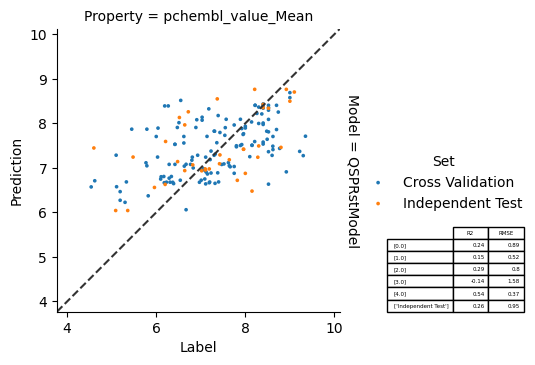

In [6]:
from qsprpred.plotting.regression import CorrelationPlot
from plotting_regression_MT import CorrelationPlot as CorrelationPlotMod

plot = CorrelationPlotMod([model])
axes, summary = plot.make(save=True, show=True, out_path='/home/s2861704/ppk/test_kin/test_output/QSPRstQ15303MOD.png')

In [7]:
summary

,Model,Fold,Property,R2,RMSE,Set
0,QSPRstModel,0.0,pchembl_value_Mean,0.237983,0.889983,Cross Validation
1,QSPRstModel,1.0,pchembl_value_Mean,0.150454,0.523536,Cross Validation
2,QSPRstModel,2.0,pchembl_value_Mean,0.293434,0.799390,Cross Validation
3,QSPRstModel,3.0,pchembl_value_Mean,-0.144601,1.584084,Cross Validation
4,QSPRstModel,4.0,pchembl_value_Mean,0.541441,0.374707,Cross Validation
5,QSPRstModel,Independent Test,pchembl_value_Mean,0.262700,0.953130,Independent Test
